In [ ]:
import pandas as pd

data = pd.read_csv('/content/iis-data.csv')

data['Weather'] = pd.Categorical(data['Weather'])
data['Weather'] = data['Weather'].cat.codes

X = data[['Moisture', 'Temperature', 'Weather']]
y = data['Pump']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', alpha= 0.0001, learning_rate = 'constant' , random_state=42)

model.fit(X_train, y_train)

accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

def predict_pump_status(moisture, temperature, weather_condition):
    weather_code = {'Sunny': 0, 'Cloudy': 1, 'Rainy': 2}
    weather_condition_code = weather_code.get(weather_condition, -1)
    if weather_condition_code == -1:
        return "Invalid weather condition"

    prediction = model.predict([[moisture, temperature, weather_condition_code]])
    return prediction[0]

Accuracy: 0.72


In [ ]:
import tensorflow as tf

tf_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(3,)),  # Input layer with 3 features
    tf.keras.layers.Dense(100, activation='relu'),  # Hidden layer 1
    tf.keras.layers.Dense(50, activation='relu'),  # Hidden layer 2
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer
])

tf_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

for i, layer in enumerate(model.coefs_):
    tf_model.layers[i].set_weights([layer, model.intercepts_[i]])

tf_model.save("pump_model_tf")
converter = tf.lite.TFLiteConverter.from_saved_model('pump_model_tf')
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

with open('pump_model.tflite', 'wb') as f:
    f.write(tflite_model)

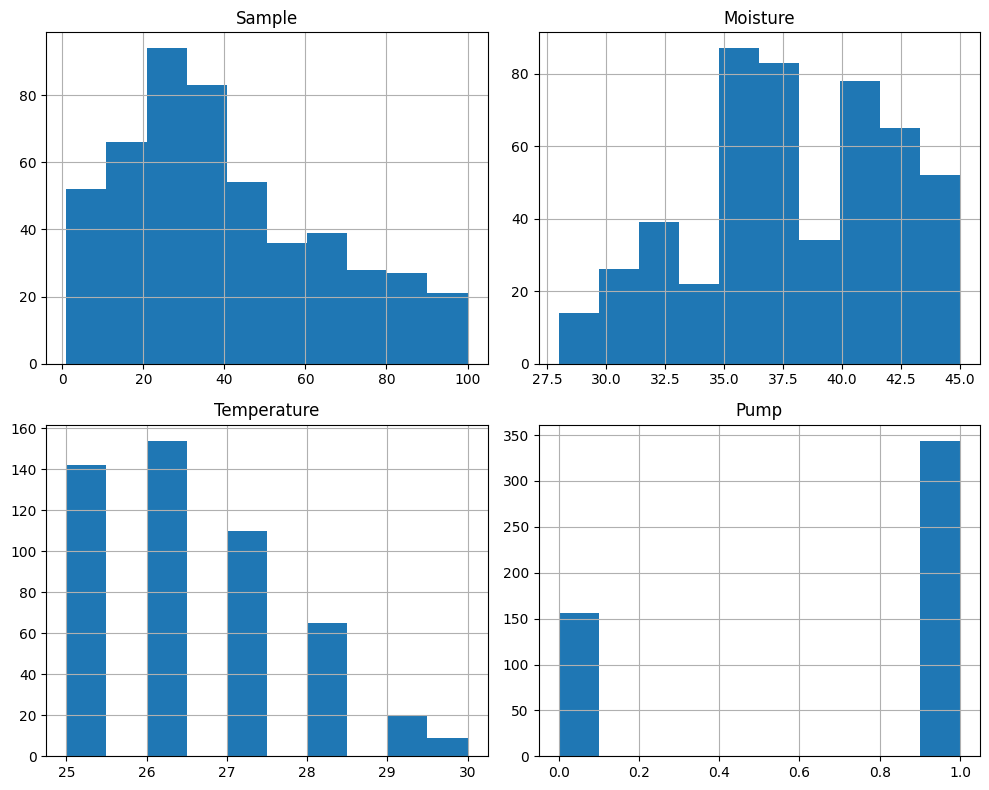

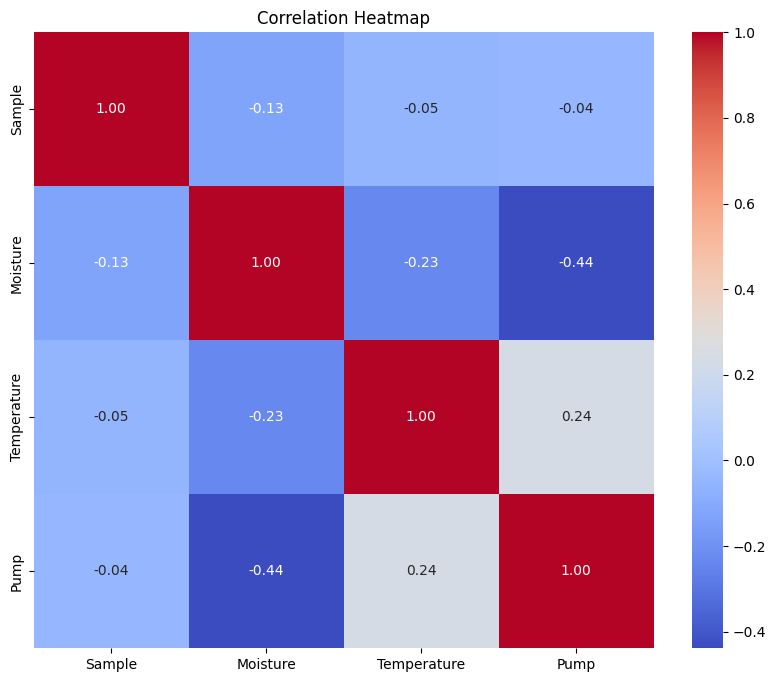

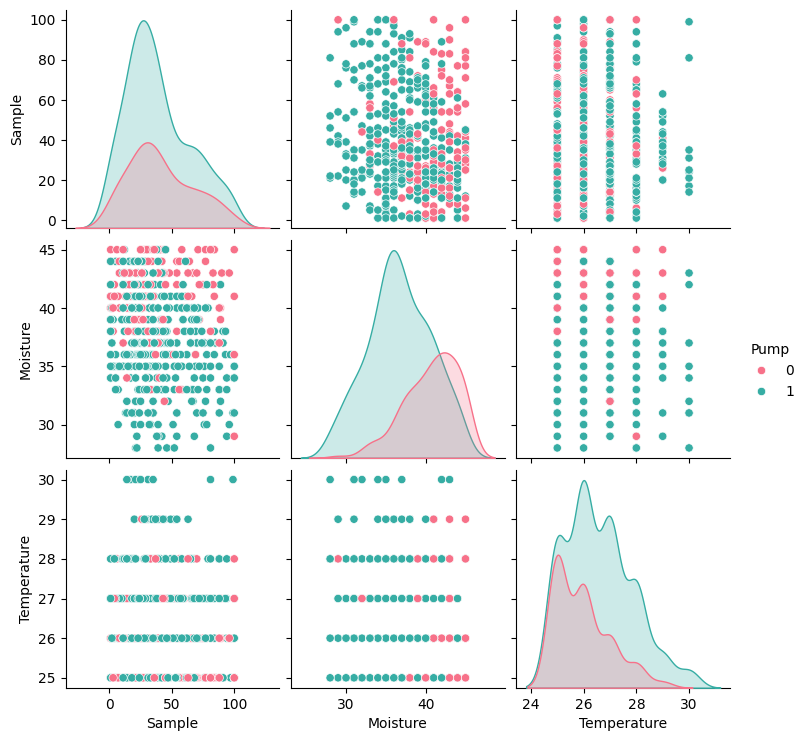

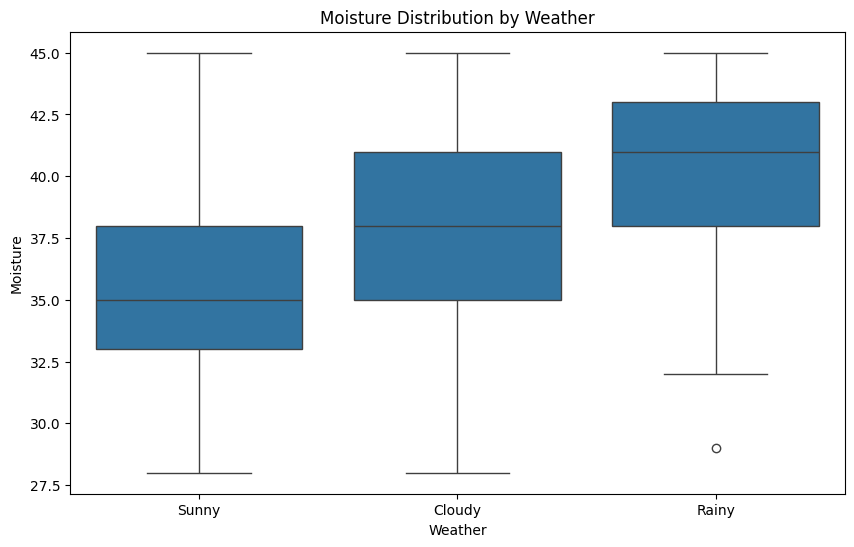

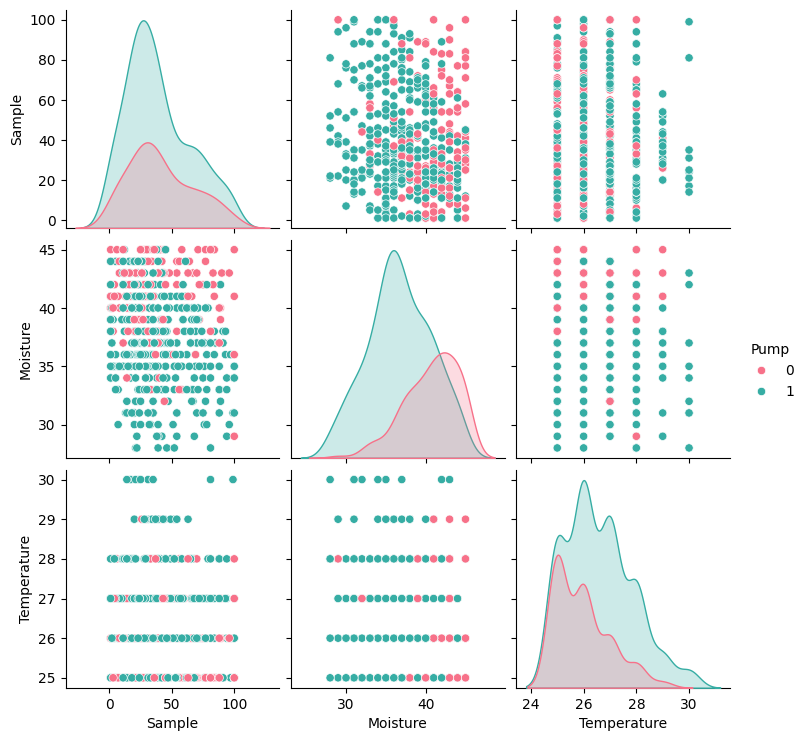

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
data = pd.read_csv('/content/iis-data.csv')

# 1. Histograms for Features
data.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

data_numeric = data.drop(columns=['Weather'])

# 2. Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()
# 3. Scatter Plots
sns.pairplot(data, hue='Pump', palette='husl')
plt.show()

# 4. Box Plots
plt.figure(figsize=(10, 6))
sns.boxplot(x='Weather', y='Moisture', data=data)
plt.title('Moisture Distribution by Weather')
plt.show()

# 5. Pair Plots
sns.pairplot(data, hue='Pump', palette='husl')
plt.show()

In [ ]:
#Custom input
custom_input = (40, 30, 'Sunny')
predicted_status = predict_pump_status(*custom_input)
print(predicted_status)

1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
